In [1]:
import esda
import pandas as pd
import geopandas
import libpysal
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

d:\anaconda\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
d:\anaconda\lib\site-packages\libpysal\io\iohandlers\__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn("SQLAlchemy and Geomet not installed, database I/O disabled")


In [2]:
directory = r'your path'

In [5]:
shp_df1 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2016.shp', encoding = 'utf-8-sig')
shp_df2 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2017.shp', encoding = 'utf-8-sig')
shp_df3 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2018.shp', encoding = 'utf-8-sig')
shp_df4 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2019.shp', encoding = 'utf-8-sig')
shp_df5 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2020.shp', encoding = 'utf-8-sig')
shp_df6 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2021.shp', encoding = 'utf-8-sig')
shp_df7 = geopandas.GeoDataFrame.from_file(filename = directory + '\\2022.shp', encoding = 'utf-8-sig')
res = [shp_df1, shp_df2, shp_df3, shp_df4,shp_df5, shp_df6,shp_df7]

In [39]:
wq = libpysal.weights.Queen.from_dataframe(shp_df1)
wq.transform='r'
# standardize the matrix

C:\Users\张栩源\AppData\Local\Temp\ipykernel_14952\1015388402.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = shp_df1.geometry.centroid # 计算多边形几何中心


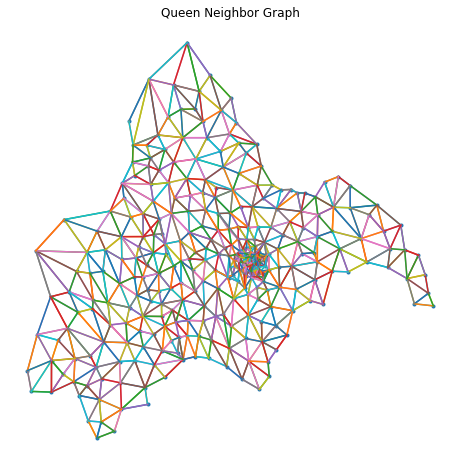

In [41]:
centroids = shp_df1.geometry.centroid # 计算多边形几何中心
fig = plt.figure(figsize=(8,8))

plt.plot(centroids.x, centroids.y,'.')
for k,neighs in wq.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()

In [44]:
for i in range(0, 7, 1):
    wq = libpysal.weights.Queen.from_dataframe(res[i])
    wq.transform='r'
    mi = esda.moran.Moran(res[i]['dentist'], wq)
    print("Moran's I 值为：",mi.I)
    print("随机分布假设下Z检验值为：",mi.z_rand)
    print("随机分布假设下Z检验的P值为：",mi.p_rand)
    print("正态分布假设下Z检验值为：",mi.z_norm)
    print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.20672908556009922
随机分布假设下Z检验值为： 6.722087172987453
随机分布假设下Z检验的P值为： 1.791389259153675e-11
正态分布假设下Z检验值为： 6.21116743932281
正态分布假设下Z检验的P值为： 5.259239710397878e-10
Moran's I 值为： 0.23344548706565965
随机分布假设下Z检验值为： 7.344804192274672
随机分布假设下Z检验的P值为： 2.0605739337042905e-13
正态分布假设下Z检验值为： 7.001720688422418
正态分布假设下Z检验的P值为： 2.5284219162813315e-12
Moran's I 值为： 0.2211318459094076
随机分布假设下Z检验值为： 7.108718051910022
随机分布假设下Z检验的P值为： 1.1712852909795402e-12
正态分布假设下Z检验值为： 6.637353166011301
正态分布假设下Z检验的P值为： 3.193667552636725e-11
Moran's I 值为： 0.2638446680066813
随机分布假设下Z检验值为： 8.17062403137231
随机分布假设下Z检验的P值为： 2.220446049250313e-16
正态分布假设下Z检验值为： 7.901249438875199
正态分布假设下Z检验的P值为： 2.6645352591003757e-15
Moran's I 值为： 0.25667692185327146
随机分布假设下Z检验值为： 7.893071192283859
随机分布假设下Z检验的P值为： 2.886579864025407e-15
正态分布假设下Z检验值为： 7.689151825013541
正态分布假设下Z检验的P值为： 1.4876988529977098e-14
Moran's I 值为： 0.271027585976109
随机分布假设下Z检验值为： 8.25800500601418
随机分布假设下Z检验的P值为： 2.220446049250313e-16
正态分布假设下Z检验值为： 8.113795995250

In [42]:
mi = esda.moran.Moran(shp_df1['dentist'], wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.20672908556009922
随机分布假设下Z检验值为： 6.722087172987453
随机分布假设下Z检验的P值为： 1.791389259153675e-11
正态分布假设下Z检验值为： 6.21116743932281
正态分布假设下Z检验的P值为： 5.259239710397878e-10


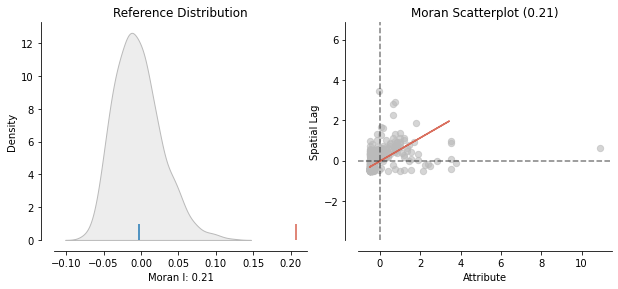

In [43]:
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()


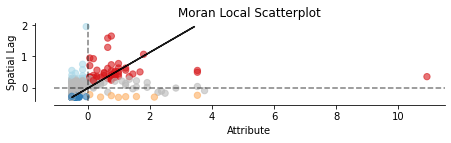

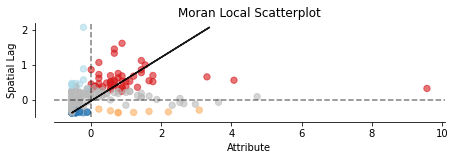

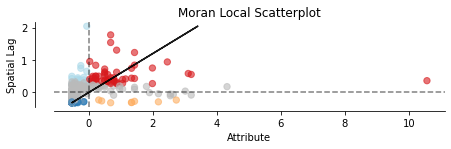

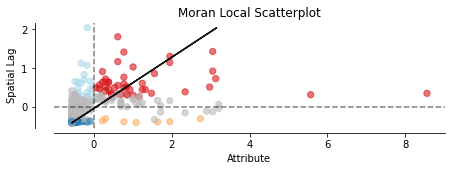

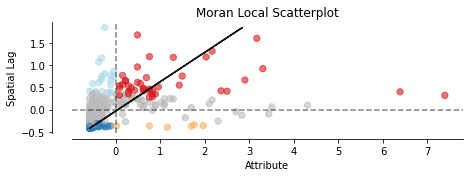

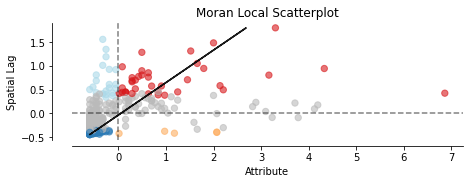

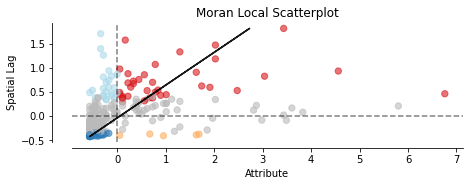

In [51]:

for i in range(0, 7, 1):
    wq = libpysal.weights.Queen.from_dataframe(res[i])
    wq.transform='r'
    lisa = esda.moran.Moran_Local(res[i]['dentist'], wq)
    # print("Moran's I 值为：",lisa.Is)
    from splot.esda import moran_scatterplot
    fig, ax = moran_scatterplot(lisa, p=0.1,aspect_equal=True)
    plt.show()